In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:06<00:00, 97.7MB/s]
100% 1.06G/1.06G [00:06<00:00, 169MB/s] 


In [ ]:

#extracting the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#neccessary imports

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")
import os
import random
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.regularizers import l2
import numpy as np
from sklearn.metrics import confusion_matrix
# from keras.metrics import AUC


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=64,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=64,
    image_size=(256,256)
)

# Get the length of the validation dataset
num_samples = len(validation_ds)

# Calculate the number of samples to pick (50% of the dataset)
num_samples_to_pick = int(num_samples * 0.5)

# Shuffle the dataset
validation_ds_shuffled = validation_ds.shuffle(num_samples)

# Take the first 50% of the shuffled dataset
test_ds = validation_ds_shuffled.take(num_samples_to_pick)


# Display classes of train_ds
print("Classes in train_ds:")
print(train_ds.class_names)

# Display classes of validation_ds
print("\nClasses in validation_ds:")
print(validation_ds.class_names)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Classes in train_ds:
['cats', 'dogs']

Classes in validation_ds:
['cats', 'dogs']


In [ ]:
# Get the class names from the original validation_ds
class_names = validation_ds.class_names

# Display classes of test_ds
print("\nClasses in test_ds:")
print(class_names)


Classes in test_ds:
['cats', 'dogs']


**The data generator used in the provided code is a TensorFlow data generator created using the image_dataset_from_directory function from the Keras utils module.**

Class counts in validation dataset:
Class Cats: 2500 images
Class Dogs: 2500 images
Total number of files in test dataset: 5000


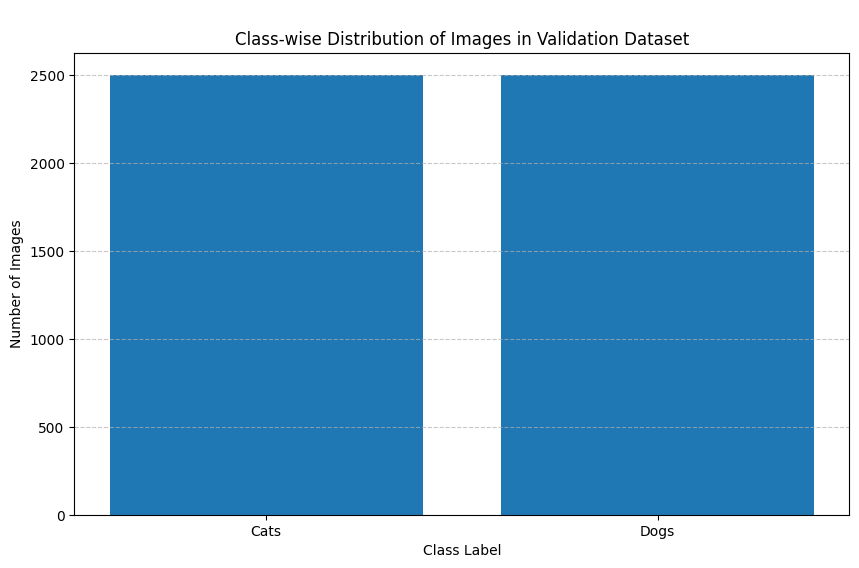

In [ ]:
class_counts = {}
vcount = 0

for images, labels in validation_ds:
    for label in labels.numpy():
        if label not in class_counts:
            class_counts[label] = 1
        else:
            class_counts[label] += 1

print("Class counts in validation dataset:")
for class_label, count in class_counts.items():
    class_name = "Cats" if class_label == 0 else "Dogs"
    print(f"Class {class_name}: {count} images")
    vcount += count

print("Total number of files in test dataset:", vcount)

# Plotting
class_labels = ["Cats", "Dogs"]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, [class_counts.get(label, 0) for label in range(len(class_labels))])
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('\nClass-wise Distribution of Images in Validation Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**The number of images is perfectly balanced as there are 2500 images each in test dataset**

Class counts in train dataset:
Class Cats: 10000 images
Class Dogs: 10000 images
Total number of files in validation dataset: 20000


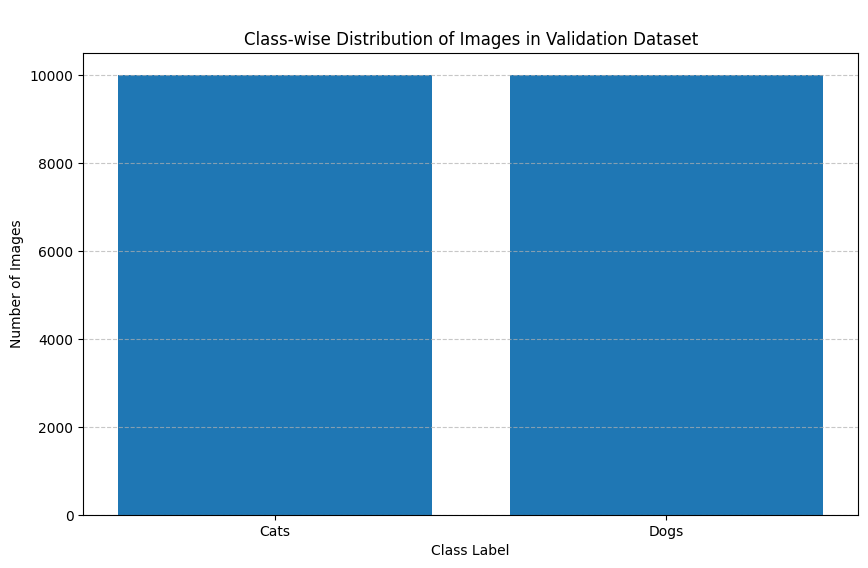

In [ ]:
class_counts = {}
train_count = 0

for images, labels in train_ds:
    for label in labels.numpy():
        if label not in class_counts:
            class_counts[label] = 1
        else:
            class_counts[label] += 1

print("Class counts in train dataset:")
for class_label, count in class_counts.items():
    class_name = "Cats" if class_label == 0 else "Dogs"
    print(f"Class {class_name}: {count} images")
    train_count += count

print("Total number of files in validation dataset:", train_count)

# Plotting
class_labels = ["Cats", "Dogs"]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, [class_counts.get(label, 0) for label in range(len(class_labels))])
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('\nClass-wise Distribution of Images in Validation Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**The number of images is perfectly balanced as there are 10000 images each in test dataset**


Class counts in train dataset:
Class Cats: 1255 images
Class Dogs: 1241 images
Total number of files in validation dataset: 2496


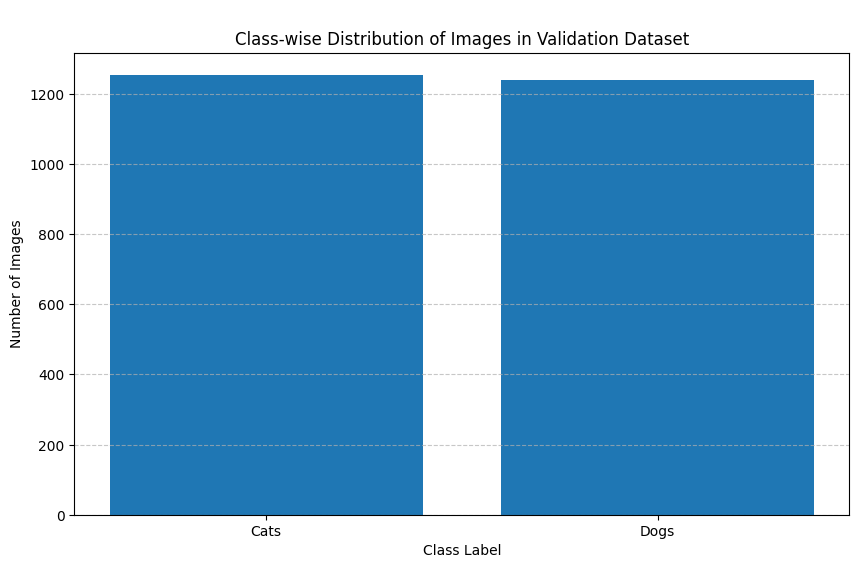

In [ ]:
class_counts = {}
train_count = 0

for images, labels in test_ds:
    for label in labels.numpy():
        if label not in class_counts:
            class_counts[label] = 1
        else:
            class_counts[label] += 1

print("Class counts in train dataset:")
for class_label, count in class_counts.items():
    class_name = "Cats" if class_label == 0 else "Dogs"
    print(f"Class {class_name}: {count} images")
    train_count += count

print("Total number of files in validation dataset:", train_count)

# Plotting
class_labels = ["Cats", "Dogs"]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, [class_counts.get(label, 0) for label in range(len(class_labels))])
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('\nClass-wise Distribution of Images in Validation Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


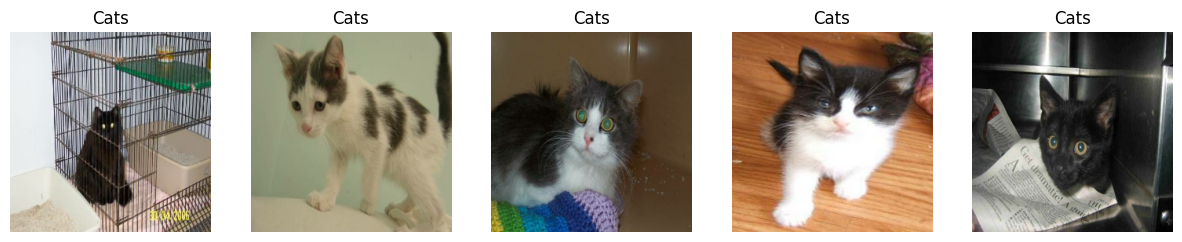

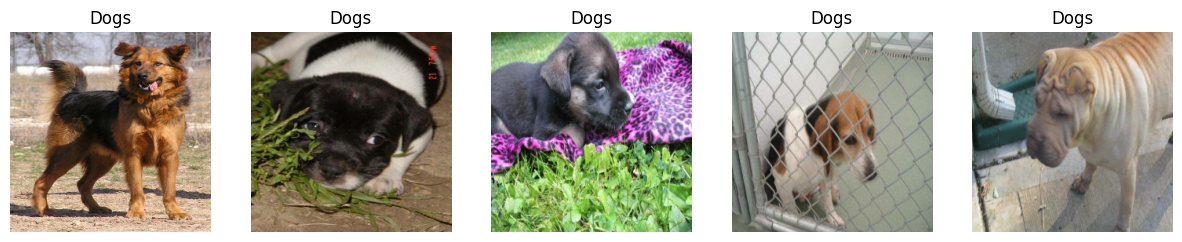

In [ ]:
class_names = ['Cats', 'Dogs']

# Visualize 5 different images per class from the training dataset
for images, labels in train_ds.take(1):  # only take one batch
    for i in range(len(class_names)):
        class_indices = np.where(labels == i)[0]
        selected_indices = class_indices[:5]  # Select the first 5 images per class
        plt.figure(figsize=(15, 10))
        for j, idx in enumerate(selected_indices):
            ax = plt.subplot(1, 5, j + 1)
            plt.imshow(images[idx].numpy().astype("uint8"))
            plt.title(class_names[i])
            plt.axis("off")
        plt.show()

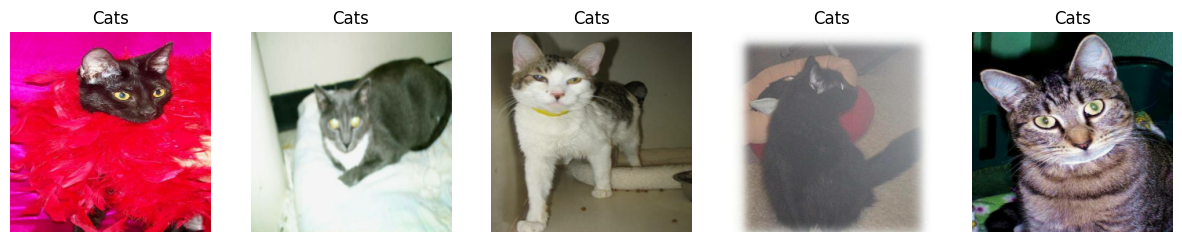

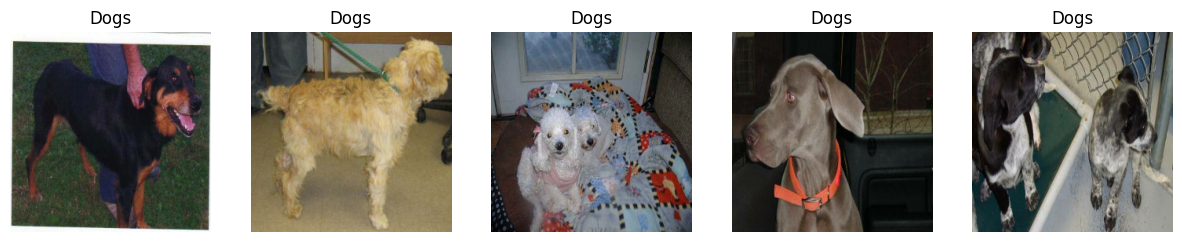

In [ ]:
class_names = ['Cats', 'Dogs']

# Visualize 5 different images per class from the training dataset
for images, labels in validation_ds.take(1):  # only take one batch
    for i in range(len(class_names)):
        class_indices = np.where(labels == i)[0]
        selected_indices = class_indices[:5]  # Select the first 5 images per class
        plt.figure(figsize=(15, 10))
        for j, idx in enumerate(selected_indices):
            ax = plt.subplot(1, 5, j + 1)
            plt.imshow(images[idx].numpy().astype("uint8"))
            plt.title(class_names[i])
            plt.axis("off")
        plt.show()

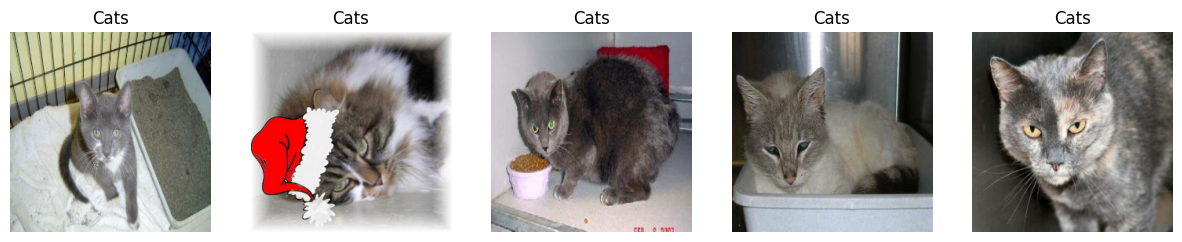

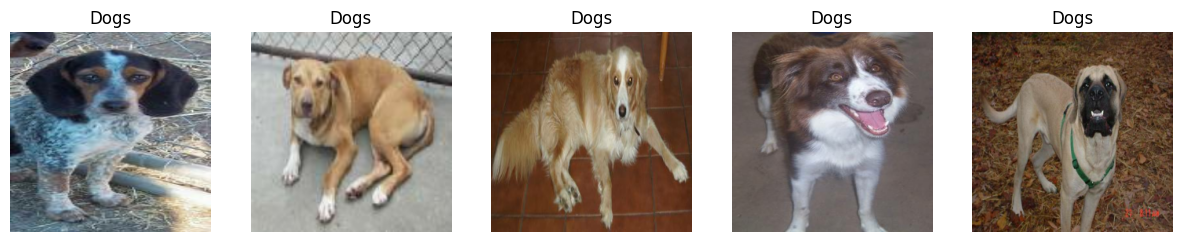

In [ ]:
class_names = ['Cats', 'Dogs']

# Visualize 5 different images per class from the training dataset
for images, labels in test_ds.take(1):  # only take one batch
    for i in range(len(class_names)):
        class_indices = np.where(labels == i)[0]
        selected_indices = class_indices[:5]  # Select the first 5 images per class
        plt.figure(figsize=(15, 10))
        for j, idx in enumerate(selected_indices):
            ax = plt.subplot(1, 5, j + 1)
            plt.imshow(images[idx].numpy().astype("uint8"))
            plt.title(class_names[i])
            plt.axis("off")
        plt.show()

In [ ]:
def check_and_delete_corrupted_images(directory):
    corrupted_images = []

    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)

        # Attempt to open the image file
        try:
            with Image.open(filepath) as img:
                img.verify()  # Attempt to open and verify the image
        except (IOError, SyntaxError) as e:
            # Handle exceptions (indicating corrupted or invalid images)
            print(f"Corrupted image: {filename} - {e}")
            corrupted_images.append(filename)
            # Delete the corrupted image
            os.remove(filepath)

    return corrupted_images

# Specify the directories for training and validation datasets
train_dogs_directory = '/content/train/dogs'
validation_dogs_directory = '/content/test/dogs'
train_cats_directory = '/content/train/cats'
validation_cats_directory = '/content/test/cats'

# Check for corrupted images in the training and validation datasets for dogs
corrupted_images_train_dogs = check_and_delete_corrupted_images(train_dogs_directory)
corrupted_images_validation_dogs = check_and_delete_corrupted_images(validation_dogs_directory)

# Check for corrupted images in the training and validation datasets for cats
corrupted_images_train_cats = check_and_delete_corrupted_images(train_cats_directory)
corrupted_images_validation_cats = check_and_delete_corrupted_images(validation_cats_directory)

# Calculate the total number of corrupted images deleted
total_corrupted_images_deleted = (len(corrupted_images_train_dogs) +
                                  len(corrupted_images_validation_dogs) +
                                  len(corrupted_images_train_cats) +
                                  len(corrupted_images_validation_cats))

print(f"Total corrupted images: {total_corrupted_images_deleted}")


Total corrupted images: 0


In [ ]:
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=32,
#     image_size=(256,256)
# )

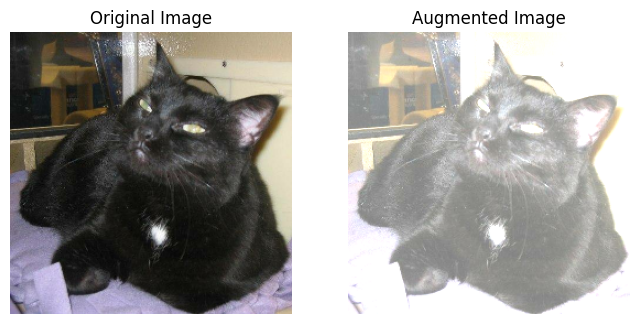

In [ ]:
# Function to apply brightness augmentation to an image
def augment_brightness(image):
    # Convert image to float32
    image = tf.cast(image, tf.float32)
    # Ensure image values are in [0, 1] range
    image = tf.clip_by_value(image / 255.0, 0.0, 1.0)
    image = tf.image.random_brightness(image, max_delta=0.5)
    # Clip values to [0, 1] range
    image = tf.clip_by_value(image, 0.0, 1.0)
    # Convert back to uint8
    image = tf.cast(image * 255.0, tf.uint8)
    return image

# Select only one image from the dataset
for images, labels in train_ds.take(1):
    original_image = images[0]  # Select the first image
    original_label = labels[0]  # Corresponding label

# Augment the selected image
augmented_image = augment_brightness(original_image)

# Display the original and augmented images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image.numpy().astype("uint8"))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image.numpy().astype("uint8"))
plt.axis("off")

plt.show()


FCNN

In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_fc = train_ds.map(process)
validation_fc = validation_ds.map(process)
test_fc= test_ds.map(process)


In [ ]:
fcmodel = Sequential()   #initializing the model

# Flatten layer
#converts 2D image arrays into 1D
fcmodel.add(tf.keras.layers.Flatten(input_shape=(256, 256, 3)))

# Dense layers
fcmodel.add(Dense(128, activation='relu'))    #hidden layer with ReLU activation
fcmodel.add(Dense(128, activation='relu'))    #repeated Layers
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))
fcmodel.add(Dense(128, activation='relu'))    #final layer before output

# Output layer
fcmodel.add(Dense(1, activation='sigmoid'))       #Sigmoid output

In [ ]:
#Compile the model
fcmodel.compile(optimizer='adam',            #Adam optimizer for efficient gradient descent
                loss='binary_crossentropy',  #this loss function is suitable for binary classification
                metrics=['accuracy'])         #Metric to monitor for performance during training


In [ ]:
fcmodel.summary()        #used to print a summary representation of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               1

In [ ]:
# Training the model on the training data for 10 epochs, using the validation data to monitor performance
fchistory = fcmodel.fit(train_fc,epochs=10,validation_data=validation_fc)

Epoch 1/10
313/313 [==============================] - 56s 157ms/step - loss: 0.7031 - accuracy: 0.5189 - val_loss: 0.6936 - val_accuracy: 0.5002
Epoch 2/10
313/313 [==============================] - 48s 151ms/step - loss: 0.6883 - accuracy: 0.5471 - val_loss: 0.7016 - val_accuracy: 0.5650
Epoch 3/10
313/313 [==============================] - 46s 144ms/step - loss: 0.6755 - accuracy: 0.5756 - val_loss: 0.6972 - val_accuracy: 0.4602
Epoch 4/10
313/313 [==============================] - 49s 153ms/step - loss: 0.6741 - accuracy: 0.5827 - val_loss: 0.6556 - val_accuracy: 0.6108
Epoch 5/10
313/313 [==============================] - 48s 149ms/step - loss: 0.6571 - accuracy: 0.6147 - val_loss: 0.6539 - val_accuracy: 0.6124
Epoch 6/10
313/313 [==============================] - 47s 149ms/step - loss: 0.6568 - accuracy: 0.6083 - val_loss: 0.6540 - val_accuracy: 0.6188
Epoch 7/10
313/313 [==============================] - 41s 129ms/step - loss: 0.6489 - accuracy: 0.6230 - val_loss: 0.6504 - val_ac

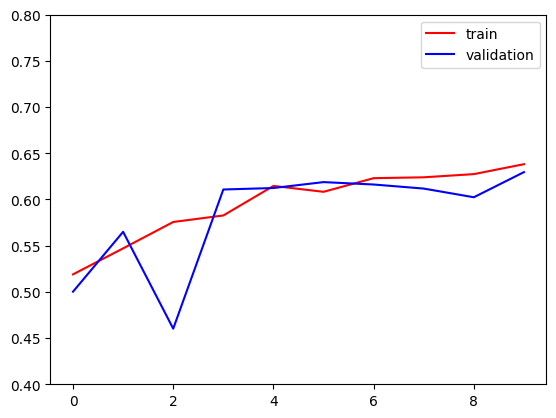

In [ ]:
#train-validation accuracy
plt.plot(fchistory.history['accuracy'], color='red', label='train')
plt.plot(fchistory.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.ylim(0.4, 0.8)  # Set y-axis limits between 0 and 1
plt.show()

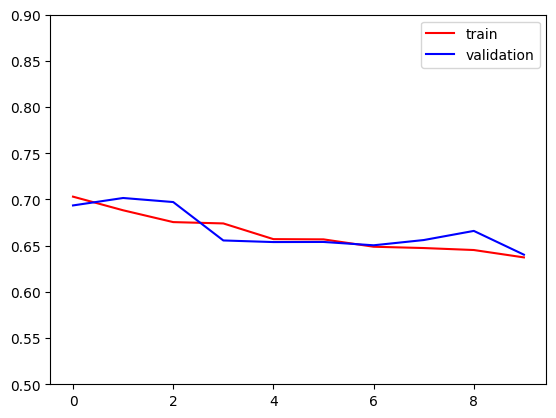

In [ ]:
#train-validation loss
#Plot for the traning and validation loss from the model's history
plt.plot(fchistory.history['loss'],color='red',label='train')   # Plot training loss
plt.plot(fchistory.history['val_loss'],color='blue',label='validation')   # Plot validation loss
plt.legend()   # to differentiate train and validation loss
plt.ylim(0.5, 0.9)  # Set y-axis limits between 0 and 1
plt.show()   #displays the plot

1/1 [==============================] - 0s 144ms/step


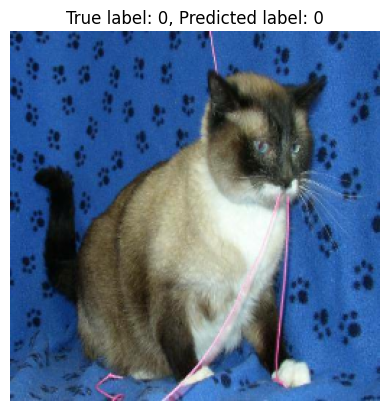

Our model says it is a  cat


In [ ]:
# Get a random batch of images and labels from the validation dataset
for images, labels in train_fc.take(1):
    random_index = np.random.randint(len(images))
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

# Preprocess the image if needed (e.g., resize, normalization)
# Assuming the image is already preprocessed

# Reshape the image to fit the model input shape if needed
# Assuming model input shape is (batch_size, height, width, channels)
random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions
prediction = fcmodel.predict(random_validation_image)

# Get the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Plot the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

if (predicted_label == 0):
  pred = 'cat'
else:
  pred = 'dog'

print("Our model says it is a ", pred)


1/1 [==============================] - 0s 17ms/step


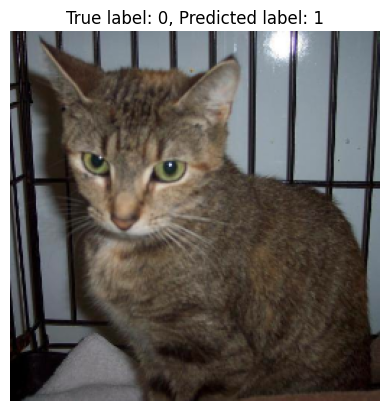

Our model says it is a  dog


In [ ]:
# Get a random batch of images and labels from the validation dataset
for images, labels in test_fc.take(1):
    random_index = np.random.randint(len(images))
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions
prediction = fcmodel.predict(random_validation_image)

# Get the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Plot the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

if (predicted_label == 0):
  pred = 'cat'
else:
  pred = 'dog'

print("Our model says it is a ", pred)


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in validation_fc:
    # Make predictions
    predictions = fcmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


1/1 [==============================] - 0s 23ms/step
Number of images with correct predictions: 3148
Number of images with incorrect predictions: 1852


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in train_fc:
    # Make predictions
    predictions = fcmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

#Counting correct and incorrect predictions
    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


1/1 [==============================] - 0s 30ms/step
Number of images with correct predictions: 13067
Number of images with incorrect predictions: 6933


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in test_fc:
    # Make predictions
    predictions = fcmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

2/2 [==============================] - 0s 13ms/step
Number of images with correct predictions: 1539
Number of images with incorrect predictions: 901


2/2 [==============================] - 0s 13ms/step


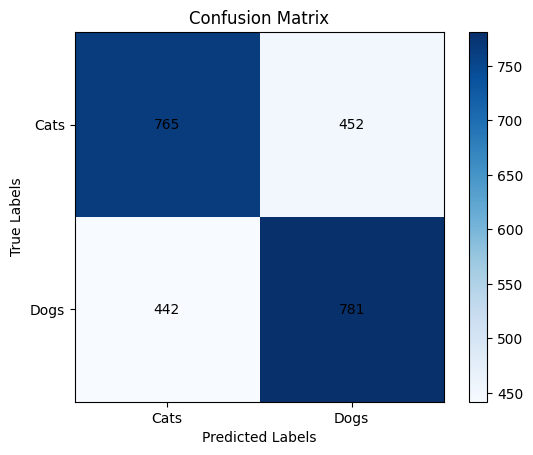

In [ ]:

# Initialize lists to store true labels and predicted labels
true_labels = []     # List to store actual labels
predicted_labels = []     # List to store model's predicted labels

# Iterate through the test dataset
for images, labels in test_fc:
    # Make predictions
    predictions = fcmodel.predict(images)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())  # Convert predictions to binary labels
    true_labels.extend(labels.numpy().astype(int))   # Store true labels as integers

# Convert lists to numpy arrays
true_labels = np.array(true_labels)      # Convert list of true labels to a numpy array
predicted_labels = np.array(predicted_labels)        # Convert list of predicted labels to a numpy array

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)    # Compute the confusion matrix from true and predicted labels

# Plot confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Cats', 'Dogs'])
plt.yticks([0, 1], ['Cats', 'Dogs'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()


In [ ]:
fcmodel.save('/content/fcmodel')

CNN

In [ ]:
# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=64,
#     image_size=(256,256)
# )

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_cnn = train_ds.map(process)
validation_cnn = validation_ds.map(process)
test_cnn = test_ds.map(process)

In [ ]:
# Create CNN model
# Initialize a sequential model
model = Sequential()
# Adding a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3),
                 kernel_regularizer=l2(0.01)))

# Normalizing the activations from the previous layer
model.add(BatchNormalization())

# Reduces the spatial dimensions (downsampling) using max pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Repeats the pattern of Convolution - Batch Normalization - Max Pooling with increased filters
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


# Flattens the output from the convolutional layers to feed into dense layers
model.add(Flatten())

# Addin fully connected layers with regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
#dropout for complexity and to prevent overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))

# Output layer with a single neuron
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_16 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [ ]:
# Compiling the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Setting up early stopping to monitor validation accuracy improvements
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)

In [ ]:
# Trainingcan the model for 15 epochs with validation data
history = model.fit(train_cnn,epochs=15,validation_data=validation_cnn)

Epoch 1/15
313/313 [==============================] - 69s 210ms/step - loss: 5.1617 - accuracy: 0.6007 - val_loss: 2.8966 - val_accuracy: 0.4838
Epoch 2/15
313/313 [==============================] - 68s 216ms/step - loss: 1.8325 - accuracy: 0.6919 - val_loss: 2.0864 - val_accuracy: 0.5592
Epoch 3/15
313/313 [==============================] - 67s 213ms/step - loss: 1.2877 - accuracy: 0.7451 - val_loss: 1.2050 - val_accuracy: 0.7406
Epoch 4/15
313/313 [==============================] - 67s 213ms/step - loss: 1.0787 - accuracy: 0.7681 - val_loss: 1.4047 - val_accuracy: 0.5836
Epoch 5/15
313/313 [==============================] - 67s 213ms/step - loss: 1.0039 - accuracy: 0.7836 - val_loss: 1.0826 - val_accuracy: 0.6890
Epoch 6/15
313/313 [==============================] - 68s 213ms/step - loss: 0.9836 - accuracy: 0.7968 - val_loss: 1.4509 - val_accuracy: 0.6622
Epoch 7/15
313/313 [==============================] - 67s 211ms/step - loss: 0.9073 - accuracy: 0.8061 - val_loss: 0.8884 - val_ac

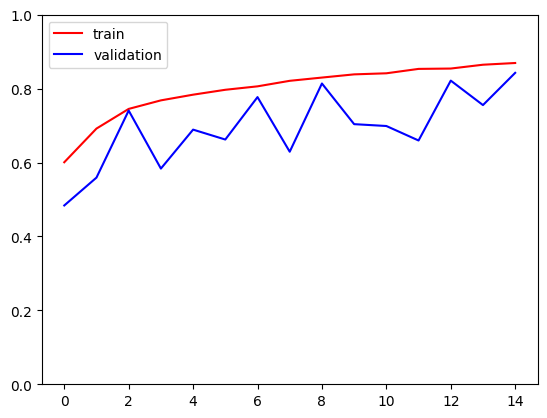

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()

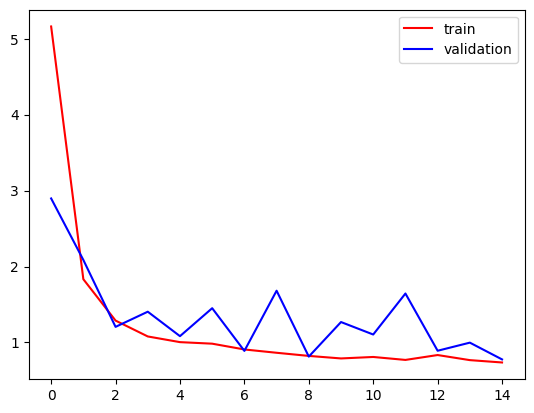

In [ ]:
#train-validation loss
#Plot for the traning and validation loss from the model's history
plt.plot(history.history['loss'],color='red',label='train')   # Plot training loss
plt.plot(history.history['val_loss'],color='blue',label='validation')  # Plot Validation loss
plt.legend()   # to differentiate train and validation loss
plt.show()        #displays the plot

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

1/1 [==============================] - 0s 335ms/step


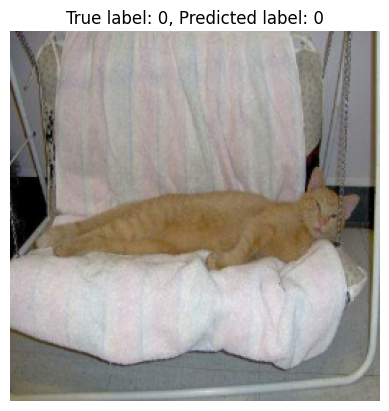

Our model says it is a  cat


In [ ]:
# Get a random batch of images and labels from the validation dataset
for images, labels in train_cnn.take(1):
    random_index = np.random.randint(len(images))
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

# Preprocess the image if needed (e.g., resize, normalization)
# Assuming the image is already preprocessed

# Reshape the image to fit the model input shape if needed
# Assuming model input shape is (batch_size, height, width, channels)
random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions
prediction = model.predict(random_validation_image)

# Get the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Plot the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

if (predicted_label == 0):
  pred = 'cat'
else:
  pred = 'dog'

print("Our model says it is a ", pred)


1/1 [==============================] - 0s 18ms/step


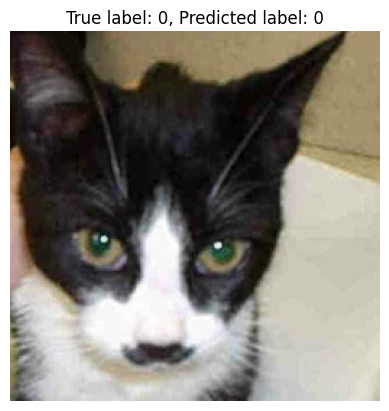

Our model says it is a  cat


In [ ]:
# Get a random batch of images and labels from the validation dataset
for images, labels in test_cnn.take(1):
    random_index = np.random.randint(len(images))
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions
prediction = model.predict(random_validation_image)

# Get the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Plot the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

if (predicted_label == 0):
  pred = 'cat'
else:
  pred = 'dog'

print("Our model says it is a ", pred)

In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in validation_cnn:
    # Make predictions
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


1/1 [==============================] - 0s 23ms/step
Number of images with correct predictions: 4213
Number of images with incorrect predictions: 787


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in train_cnn:
    # Make predictions
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


1/1 [==============================] - 0s 43ms/step
Number of images with correct predictions: 17587
Number of images with incorrect predictions: 2413


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in test_cnn:
    # Make predictions
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)


2/2 [==============================] - 0s 27ms/step
Number of images with correct predictions: 2115
Number of images with incorrect predictions: 381


2/2 [==============================] - 0s 27ms/step


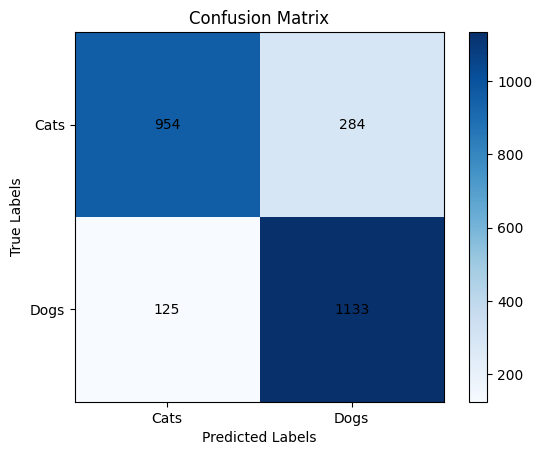

In [ ]:

  # Initialize lists to store true labels and predicted labels
  true_labels = []
  predicted_labels = []

  # Iterate through the test dataset
  for images, labels in test_cnn:
      # Make predictions
      predictions = model.predict(images)
      predicted_labels.extend((predictions > 0.5).astype(int).flatten())  # Convert predictions to binary labels
      true_labels.extend(labels.numpy().astype(int))  # Convert true labels to binary labels

  # Convert lists to numpy arrays
  true_labels = np.array(true_labels)
  predicted_labels = np.array(predicted_labels)

  # Calculate confusion matrix
  conf_matrix = confusion_matrix(true_labels, predicted_labels)

  # Plot confusion matrix
  plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.xticks([0, 1], ['Cats', 'Dogs'])
  plt.yticks([0, 1], ['Cats', 'Dogs'])
  for i in range(2):
      for j in range(2):
          plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
  plt.show()


In [ ]:
model.save('/content/cnnmodel')

In [ ]:
# Transfer Learning

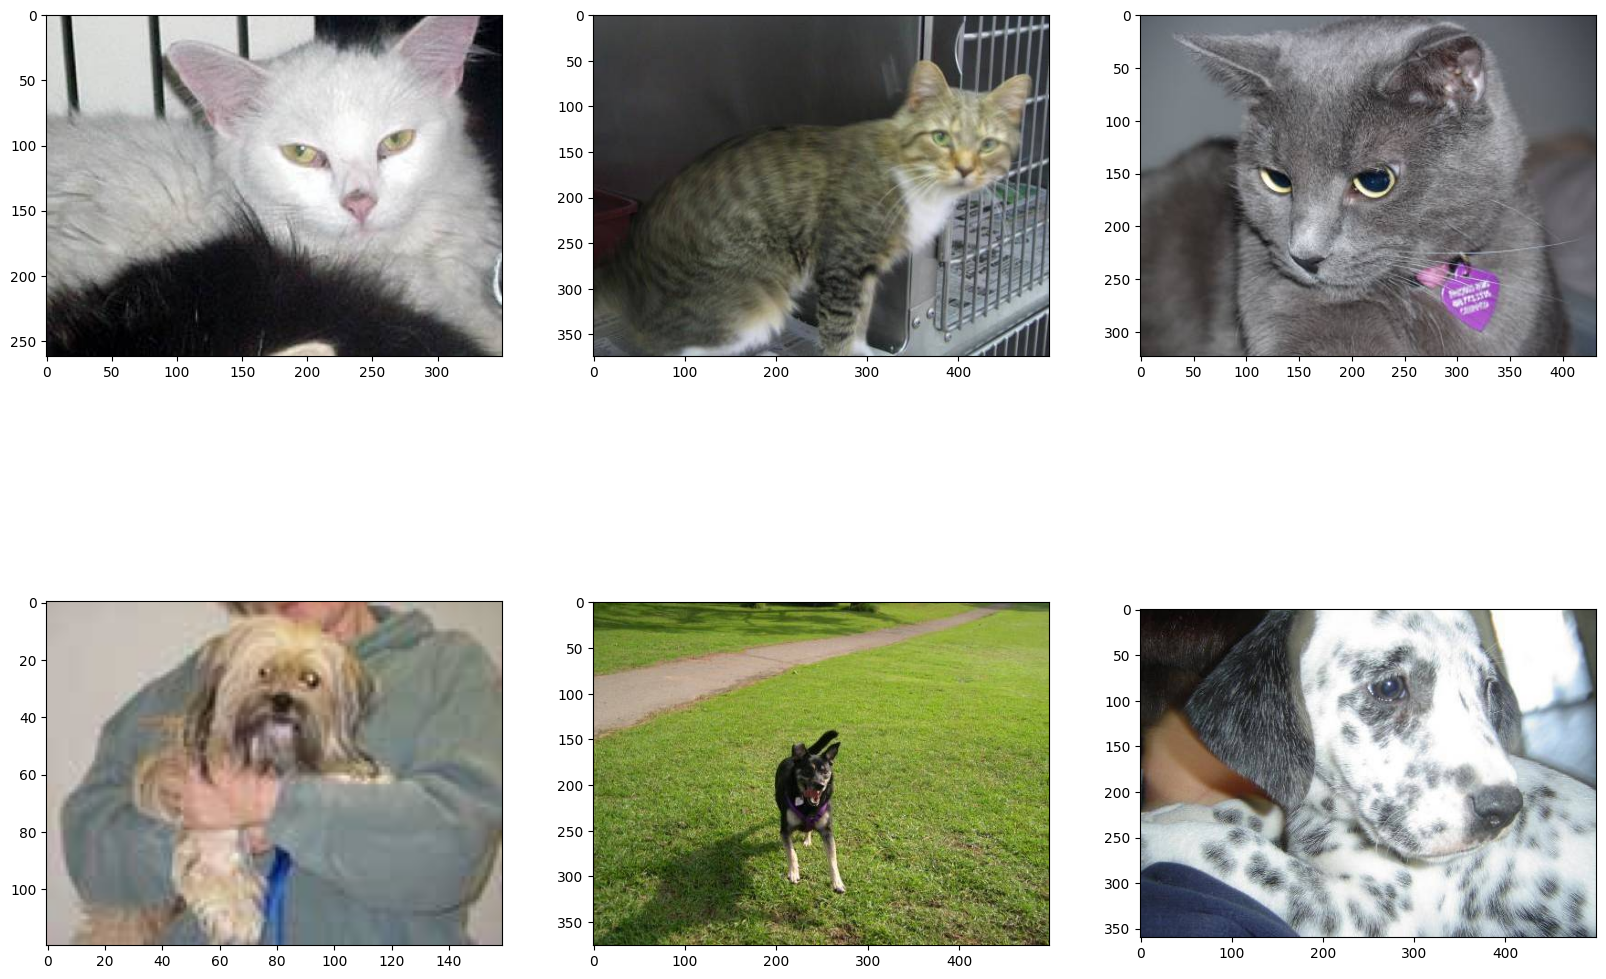

In [ ]:
image_directory = '/content/train/cats'
image_directory2 = '/content/train/dogs'
image_files = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
image_files2 = [os.path.join(image_directory2,filename) for filename in os.listdir(image_directory2)]
num_samples = 3
selected_images = random.sample(image_files, num_samples)
selected_images2 = random.sample(image_files2,num_samples)
# Create subplots for displaying images
fig, axes = plt.subplots(2, num_samples, figsize=(20,14))

# Display each selected image
for i, image_path in enumerate(selected_images):
    ax = axes[0,i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis()
for i, image_path in enumerate(selected_images2):
    ax = axes[1,i]
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis()
# Show the images
plt.show()

In [ ]:
# # generators
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/train',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=64,
#     image_size=(256,256)
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = '/content/test',
#     labels='inferred',
#     label_mode = 'int',
#     batch_size=64,
#     image_size=(256,256)
# )

# # Get the length of the validation dataset
# num_samples = len(validation_ds)

# # Calculate the number of samples to pick (50% of the dataset)
# num_samples_to_pick = int(num_samples * 0.5)

# # Shuffle the dataset
# validation_ds_shuffled = validation_ds.shuffle(num_samples)

# # Take the first 50% of the shuffled dataset
# test_ds = validation_ds_shuffled.take(num_samples_to_pick)


# # Display classes of train_ds
# print("Classes in train_ds:")
# print(train_ds.class_names)

# # Display classes of validation_ds
# print("\nClasses in validation_ds:")
# print(validation_ds.class_names)

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


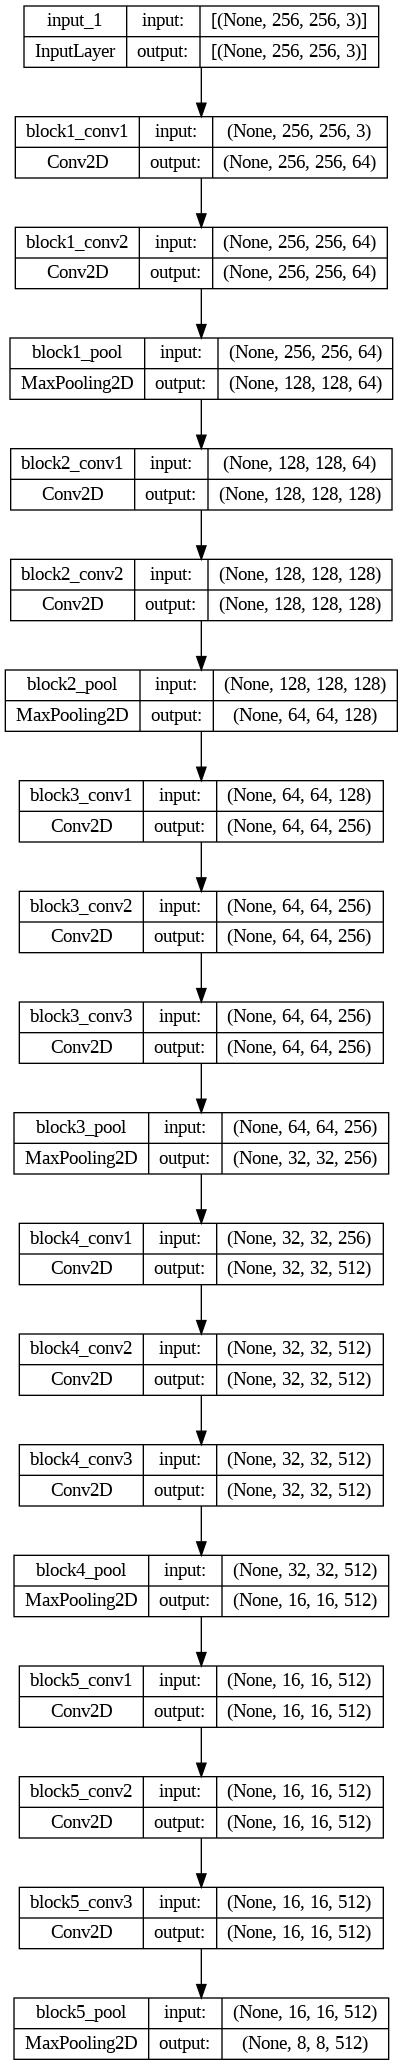

In [ ]:
plot_model(conv_base,show_shapes=True)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
tfmodel = Sequential()

tfmodel.add(conv_base)
tfmodel.add(Flatten())
tfmodel.add(Dense(256,activation='relu'))
tfmodel.add(Dense(1,activation='sigmoid'))

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_ds.map(process)
validation_data = validation_ds.map(process)
test_data = test_ds.map(process)


In [ ]:
tfmodel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_32 (Dense)            (None, 256)               8388864   
                                                                 
 dense_33 (Dense)            (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 15468545 (59.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
# Compiles the model with RMSprop optimizer and binary cross-entropy loss

tfmodel.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fit the model
history_tf = tfmodel.fit(train_data,epochs=5,validation_data=validation_data)

Epoch 1/5
313/313 [==============================] - 188s 538ms/step - loss: 0.2246 - accuracy: 0.9055 - val_loss: 0.1196 - val_accuracy: 0.9530
Epoch 2/5
313/313 [==============================] - 169s 540ms/step - loss: 0.1047 - accuracy: 0.9579 - val_loss: 0.0921 - val_accuracy: 0.9634
Epoch 3/5
313/313 [==============================] - 170s 541ms/step - loss: 0.0696 - accuracy: 0.9745 - val_loss: 0.1284 - val_accuracy: 0.9458
Epoch 4/5
313/313 [==============================] - 170s 542ms/step - loss: 0.0507 - accuracy: 0.9814 - val_loss: 0.0817 - val_accuracy: 0.9656
Epoch 5/5
313/313 [==============================] - 170s 542ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0815 - val_accuracy: 0.9678


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in validation_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

1/1 [==============================] - 0s 143ms/step
Number of images with correct predictions: 4839
Number of images with incorrect predictions: 161


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in train_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

1/1 [==============================] - 0s 41ms/step
Number of images with correct predictions: 19875
Number of images with incorrect predictions: 125


In [ ]:
# Initialize counts
correct_predictions = 0
incorrect_predictions = 0

# Iterate through the validation dataset
for images, labels in test_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels = (predictions > 0.5).astype(int)

    # Compare true labels with predicted labels
    for true_label, predicted_label in zip(labels.numpy(), predicted_labels):
        true_label = true_label.item()
        if true_label == predicted_label:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

# Display counts
print("Number of images with correct predictions:", correct_predictions)
print("Number of images with incorrect predictions:", incorrect_predictions)

2/2 [==============================] - 0s 171ms/step
Number of images with correct predictions: 2364
Number of images with incorrect predictions: 76


1/1 [==============================] - 1s 942ms/step


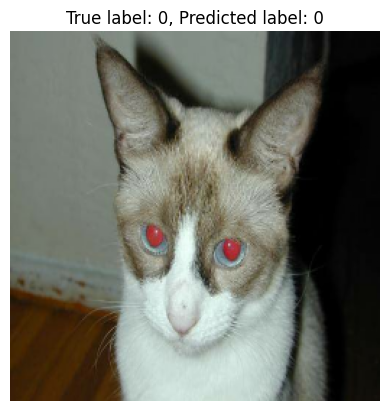

Our model says it is a  cat


In [ ]:
# Get a random batch of images and labels from the test dataset
for images, labels in test_data.take(1):
    random_index = np.random.randint(len(images))
    random_validation_image = images[random_index]
    true_label = labels[random_index].numpy()

random_validation_image = np.expand_dims(random_validation_image, axis=0)

# Make predictions
prediction = tfmodel.predict(random_validation_image)

# Get the predicted class (assuming binary classification)
predicted_label = 1 if prediction > 0.5 else 0

# Plot the image
plt.imshow(random_validation_image.squeeze(), cmap='gray')  # Assuming grayscale image
plt.axis('off')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()

if (predicted_label == 0):
  pred = 'cat'
else:
  pred = 'dog'

print("Our model says it is a ", pred)


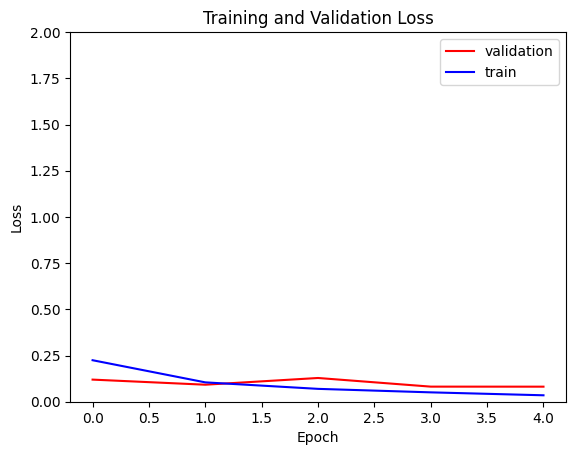

In [ ]:
# Plot validation loss and training loss
plt.plot(history_tf.history['val_loss'], color='red', label='validation')
plt.plot(history_tf.history['loss'], color='blue', label='train')
plt.legend()
plt.ylim(0, 2)  # Adjust the y-axis limit as needed
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


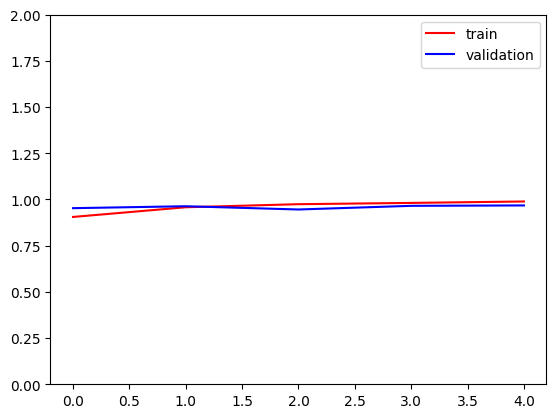

In [ ]:
plt.plot(history_tf.history['accuracy'], color='red', label='train')
plt.plot(history_tf.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.ylim(0, 2)  # Set y-axis limits between 0 and 1
plt.show()

2/2 [==============================] - 0s 172ms/step


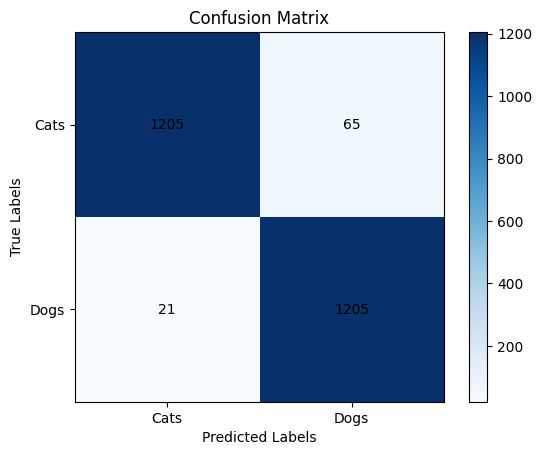

In [ ]:

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for images, labels in test_data:
    # Make predictions
    predictions = tfmodel.predict(images)
    predicted_labels.extend((predictions > 0.5).astype(int).flatten())  # Convert predictions to binary labels
    true_labels.extend(labels.numpy().astype(int))  # Convert true labels to binary labels

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Cats', 'Dogs'])
plt.yticks([0, 1], ['Cats', 'Dogs'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.show()


In [ ]:
tfmodel.save('/content/tlmodel')

ROC AUC CURVE

2/2 [==============================] - 0s 179ms/step


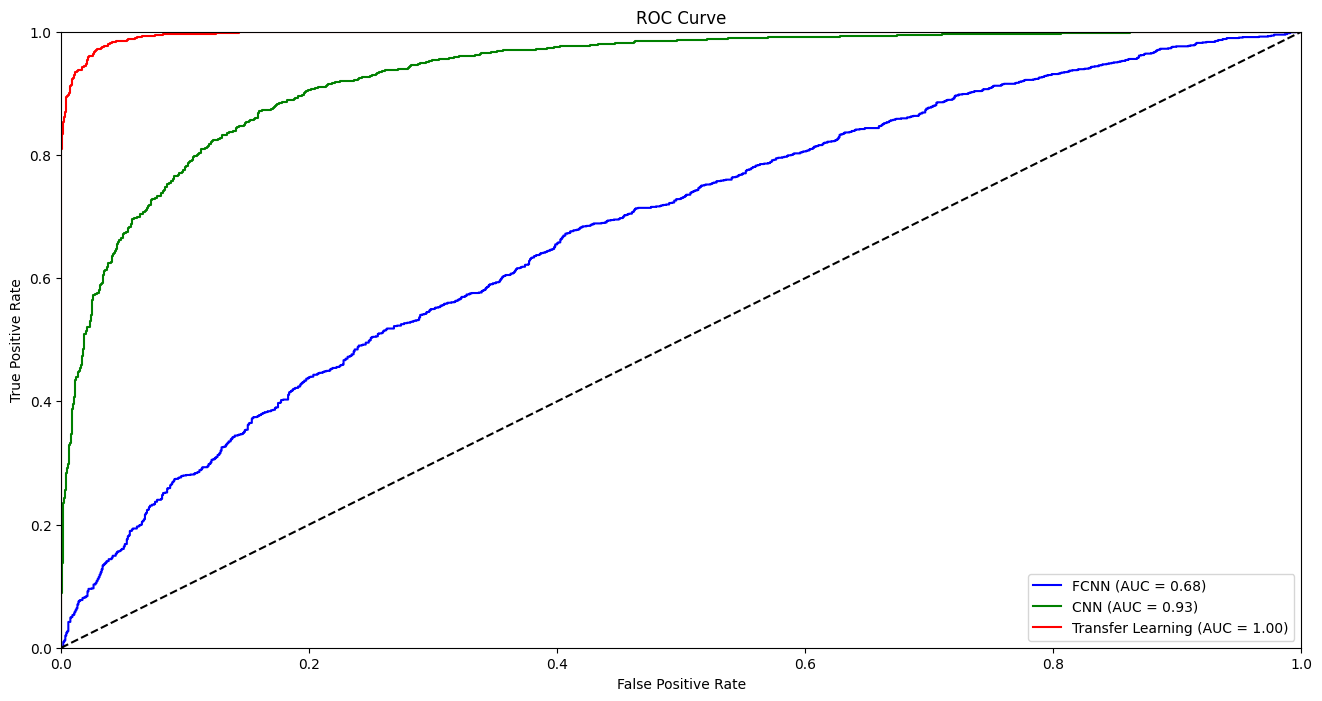

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities for each model
true_labels = []
true_labels1 = []
true_labels2 = []

predicted_probabilities = []
predicted_probabilities1 = []
predicted_probabilities2 = []

# Iterate through the test dataset for the first model (test_fc)
for images, labels in test_fc:
    # Make predictions
    predictions = fcmodel.predict(images)
    true_labels.extend(labels.numpy())  # Convert true labels to numpy array and extend the list
    predicted_probabilities.extend(predictions.flatten())  # Flatten predictions and extend the list

# Iterate through the test dataset for the second model (test_cnn)
for images, labels in test_cnn:
    # Make predictions
    predictions1 = model.predict(images)
    true_labels1.extend(labels.numpy())  # Convert true labels to numpy array and extend the list
    predicted_probabilities1.extend(predictions1.flatten())  # Flatten predictions and extend the list

# Iterate through the test dataset for the third model (test_data)
for images, labels in test_data:
    # Make predictions
    predictions2 = tfmodel.predict(images)
    true_labels2.extend(labels.numpy())  # Convert true labels to numpy array and extend the list
    predicted_probabilities2.extend(predictions2.flatten())  # Flatten predictions and extend the list

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
true_labels1 = np.array(true_labels1)
true_labels2 = np.array(true_labels2)

predicted_probabilities = np.array(predicted_probabilities)
predicted_probabilities1 = np.array(predicted_probabilities1)
predicted_probabilities2 = np.array(predicted_probabilities2)

# Calculate the false positive rate, true positive rate, and thresholds for each model
fpr_fc, tpr_fc, _ = roc_curve(true_labels, predicted_probabilities)
fpr_cnn, tpr_cnn, _ = roc_curve(true_labels1, predicted_probabilities1)
fpr_tf, tpr_tf, _ = roc_curve(true_labels2, predicted_probabilities2)

# Calculate the AUC score for each model
auc_fc = auc(fpr_fc, tpr_fc)
auc_cnn = auc(fpr_cnn, tpr_cnn)
auc_tf = auc(fpr_tf, tpr_tf)

# Create a new figure with a size of 16 by 8 inches
plt.figure(figsize=(16, 8))

# Plot the ROC curve for each model
plt.plot(fpr_fc, tpr_fc, 'b', label=f'FCNN (AUC = {auc_fc:.2f})')
plt.plot(fpr_cnn, tpr_cnn, 'g', label=f'CNN (AUC = {auc_cnn:.2f})')
plt.plot(fpr_tf, tpr_tf, 'r', label=f'Transfer Learning (AUC = {auc_tf:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Set the x and y limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# Set the axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Add a title
plt.title('ROC Curve')

# Add a legend
plt.legend(loc='lower right')

# Display the plot
plt.show()
